In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [4]:
!pip install prophet



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading WESM Price Dataset

In [5]:
df1 = pd.read_parquet(r'C:\Users\jason.paquibulan\Downloads\12 Month Historical WESM.parquet')

df1 = df1[df1.index >= '2023-01-1']

df1 = df1.reset_index()
df1 = df1[['NewDate','CVIS']]
df1 = df1.rename(columns = {'NewDate':'ds','CVIS':'y'})
df1 = df1.set_index('ds')

df1 = df1.reset_index()

In [6]:
df1

,ds,y
0,2023-01-01 00:00:00,13100.02
1,2023-01-01 01:00:00,6823.15
2,2023-01-01 02:00:00,6823.15
3,2023-01-01 03:00:00,6823.15
4,2023-01-01 04:00:00,6823.15
...,...,...
8588,2023-12-24 20:00:00,15915.44
8589,2023-12-24 21:00:00,15915.44
8590,2023-12-24 22:00:00,15915.44
8591,2023-12-24 23:00:00,15915.44


## Plotting Data

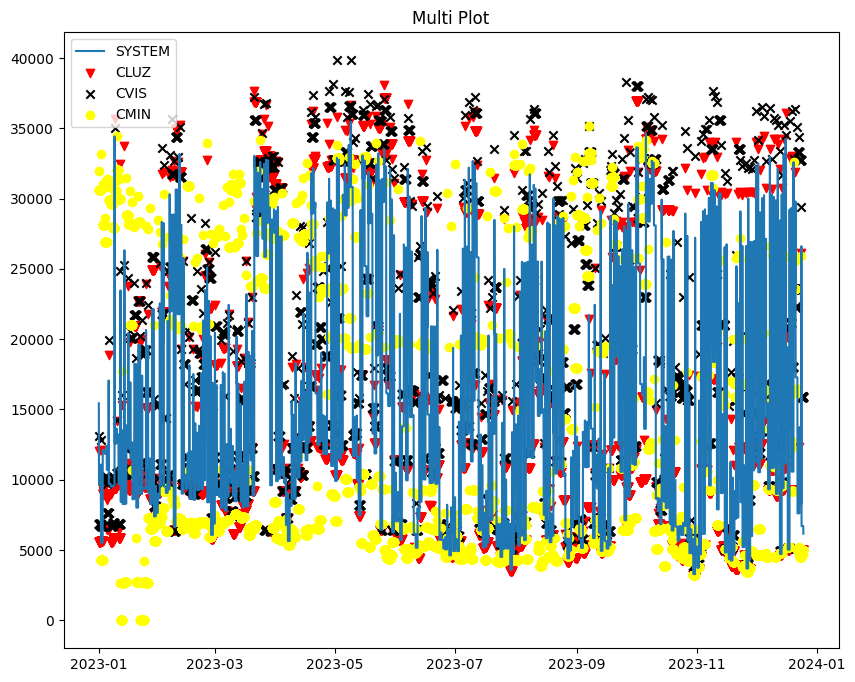

In [7]:
start_date = '2023-1-1'
end_date = '2024-1-1'

df = pd.read_parquet(r'C:\Users\jason.paquibulan\Downloads\12 Month Historical WESM.parquet')

df1= df[(df.index >= start_date)& (df.index < end_date)]

df_index= df1[(df1.index >= start_date)& (df1.index < end_date)].index

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df_index, df1['SYSTEM'], label='SYSTEM')

ax.scatter(df_index, df1['CLUZ'], label='CLUZ',marker = 'v',color = 'red')


ax.scatter(df_index, df1['CVIS'], label='CVIS',marker = 'x',color = 'black')

# Add more scatter plots if needed
# Example:
ax.scatter(df_index, df1['CMIN'], label='CMIN', marker='o',color = 'yellow')

# Set the title of the plot
ax.set_title('Multi Plot')

# Add a legend to identify each series
ax.legend()

# Show the plot
plt.show()


In [8]:
vec = pd.read_parquet(r'C:\Users\jason.paquibulan\Downloads\VECLantauForecasts.parquet')
vec = vec.set_index('Date')

vec =vec[vec.index < '2024-1-1']

vec

,VECForecasts,LantauForecasts
Date,,
2023-01-01 00:00:00,5054.012650,4698.576369
2023-01-01 01:00:00,5003.261182,4780.808208
2023-01-01 02:00:00,4932.596262,4766.109764
2023-01-01 03:00:00,4600.761229,4567.243778
2023-01-01 04:00:00,4600.761048,4651.091123
...,...,...
2023-12-31 19:00:00,6485.219674,6348.629889
2023-12-31 20:00:00,5798.671689,5718.289580
2023-12-31 21:00:00,5798.671623,5621.631495


In [9]:
df1 = pd.read_parquet(r'C:\Users\jason.paquibulan\Downloads\12 Month Historical WESM.parquet')

df1 = df1[df1.index >= '2023-01-1']

df1 = df1.reset_index()
df1 = df1[['NewDate','CVIS']]
df1 = df1.rename(columns = {'NewDate':'ds','CVIS':'y'})
df1 = df1.set_index('ds')

df1 = df1.reset_index()

09:00:11 - cmdstanpy - INFO - Chain [1] start processing
09:00:30 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

09:00:35 - cmdstanpy - INFO - Chain [1] start processing
09:00:36 - cmdstanpy - INFO - Chain [1] done processing
09:00:42 - cmdstanpy - INFO - Chain [1] start processing
09:00:46 - cmdstanpy - INFO - Chain [1] done processing
09:00:54 - cmdstanpy - INFO - Chain [1] start processing
09:01:03 - cmdstanpy - INFO - Chain [1] done processing


0.6496077619387498

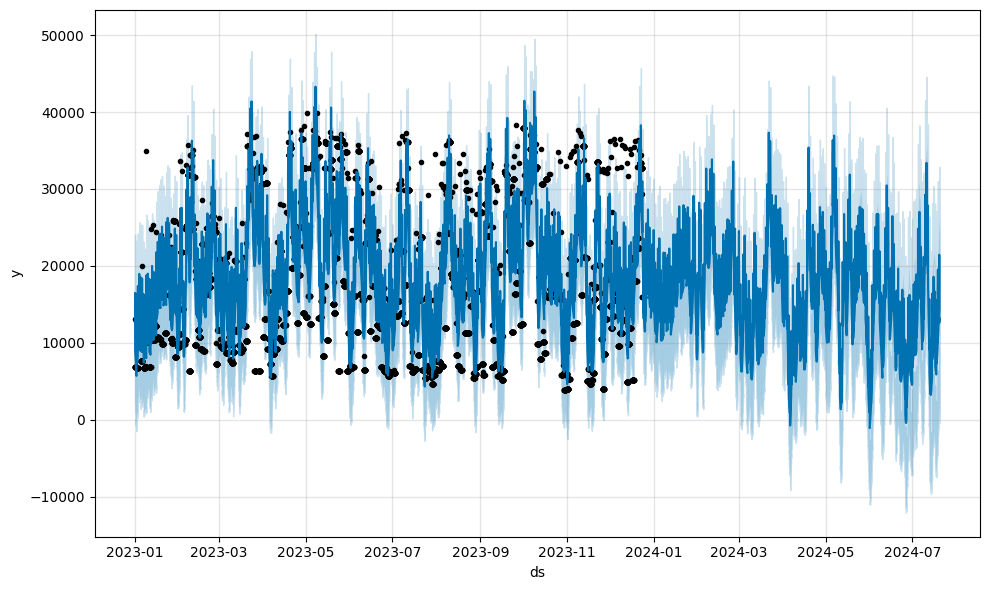

In [14]:
from prophet import Prophet

df1 = pd.read_parquet(r'C:\Users\jason.paquibulan\Downloads\12 Month Historical WESM.parquet')

df1 = df1[df1.index >= '2023-01-1']

df1 = df1.reset_index()
df1 = df1[['NewDate','CVIS']]
df1 = df1.rename(columns = {'NewDate':'ds','CVIS':'y'})
df1 = df1.set_index('ds')

df1 = df1.reset_index()

    # 'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    # 'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    # 'yearly_seasonality': [10, 100, 500, 800],
    # 'daily_seasonality': [10, 100, 500, 800],
    # 'weekly_seasonality': [10, 100, 500, 800],


model = Prophet(growth='linear',
                # changepoints=None,
                # n_changepoints=0, 
                # changepoint_range=1,
                # changepoint_prior_scale=1,
#                 seasonality_mode='additive',
                seasonality_prior_scale=0.005,
# #                 interval_width=0.80,
# #                yearly_seasonality=500, 
                yearly_seasonality=100, # 1.1
                # yearly_seasonality=10, # 1.19
                daily_seasonality=100, #1.15
                # # daily_seasonality=500, #1.13
                # # daily_seasonality=700, #1.131
                # daily_seasonality=5000, #1.112
                # daily_seasonality=10000, #1.128
                # daily_seasonality=9000, #1.128
                weekly_seasonality=100,
               )

model.fit(df1[['ds','y']])

forecast_date = model.make_future_dataframe(periods = 5000, freq = 'h')

forecast = model.predict(forecast_date)

model_1 = model.plot(forecast)

# model.plot_components(forecast)

from prophet.diagnostics import cross_validation

# CROSS VALIDATION WITH 3 FOLD

forward_length = 730*3 # approximate 730 HOURS per month
cutoffs = pd.to_datetime(['2023-3-1', '2023-7-1', '2023-9-1'])

df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon=f'{forward_length} hours')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv2)

df_p['mape'].mean()


## Diagnostics for the Model

In [11]:
# from prophet.diagnostics import cross_validation

# forward_length = 730*3 # approximate 730 HOURS per month
# cutoffs = pd.to_datetime(['2023-3-1', '2023-7-1', '2023-9-1'])

# df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon=f'{forward_length} hours')

# from prophet.diagnostics import performance_metrics
# df_p = performance_metrics(df_cv2)

# df_p['mape'].mean()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

08:59:28 - cmdstanpy - INFO - Chain [1] start processing
08:59:29 - cmdstanpy - INFO - Chain [1] done processing
08:59:35 - cmdstanpy - INFO - Chain [1] start processing
08:59:40 - cmdstanpy - INFO - Chain [1] done processing
08:59:48 - cmdstanpy - INFO - Chain [1] start processing
08:59:57 - cmdstanpy - INFO - Chain [1] done processing


0.6496077619387498

## Hyperparameter Optimization

In [12]:
# # Python
# import itertools
# import numpy as np
# import pandas as pd

# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#     'yearly_seasonality': [10, 100, 500, 800],
#     'daily_seasonality': [10, 100, 500, 800],
#     'weekly_seasonality': [10, 100, 500, 800],
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# mape = []  # Store the mapes for each params here

# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(df1)  # Fit model with given params
#     df_cv = cross_validation(m, cutoffs=cutoffs, horizon=f'{forward_length} hours', parallel="processes")
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     mape.append(df_p['mape'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['mape'] = mape
# print(tuning_results)

## MAPE for Cross Validation is 0.64 %, comparing to Naive Forecast

In [13]:
df2 = df1

df2['naive_forecast'] = df1['y'].shift(1)

df2['APE-Naive'] = abs((df2['y']-df2['naive_forecast'])/(df2['y']))*100

df2['APE-Naive'].mean() # MAPE

5.276072431449997

## Naive Forecast MAPE is 5.27%

## Using Prophet Forecast Model since cross-validated error is less than Naive Forecast's error.